## Preparação dos dados

In [20]:
import h5py    
import matplotlib.pyplot as plt

O código abaixo mostra como está estruturado o arquivo .hdf5 para que possamos acessar apenas os dados que estamos interessados. 

In [21]:
# Open the file in read-only mode ('r')
file_path = 'GWdatabase.h5'
file = h5py.File(file_path, 'r')

# List all group names, dataset names, and attributes in the file
def list_hdf5_items(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
        for key, value in obj.attrs.items():
            print(f"  Attribute: {key} = {value}")
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")
        for key, value in obj.attrs.items():
            print(f"  Attribute: {key} = {value}")

file.visititems(list_hdf5_items)

Group: reduced_data
Dataset: reduced_data/A(km)
Dataset: reduced_data/D*bounce_amplitude_1(cm)
Dataset: reduced_data/D*bounce_amplitude_2(cm)
Dataset: reduced_data/EOS
Dataset: reduced_data/MbarICgrav(Msun)
Dataset: reduced_data/Mgrav1_IC_b(Msun)
Dataset: reduced_data/Mrest_IC_b(Msun)
Dataset: reduced_data/SNR(aLIGOfrom10kpc)
Dataset: reduced_data/T_c_b(MeV)
Dataset: reduced_data/Ye_c_b
Dataset: reduced_data/alpha_c_b
Dataset: reduced_data/beta1_IC_avg
Dataset: reduced_data/beta1_IC_b
Dataset: reduced_data/fpeak(Hz)
Dataset: reduced_data/j_IC_b(g*cm^2|s)
Dataset: reduced_data/omega_0(rad|s)
Dataset: reduced_data/omega_max(rad|s)
Dataset: reduced_data/rPNSequator_b(km)
Dataset: reduced_data/rPNSpole_b(km)
Dataset: reduced_data/r_omega_max(km)
Dataset: reduced_data/rho_c_b(g|ccm)
Dataset: reduced_data/rhobar_c_postbounce(g|ccm)
Dataset: reduced_data/s_c_b(kB|baryon)
Dataset: reduced_data/t_bounce_end(s)
Dataset: reduced_data/t_postbounce_end(s)
Dataset: reduced_data/tbounce(s)
Group: wav

In [22]:
for key in file.keys():
    print (key)

reduced_data
waveforms
yeofrho


Um descrição completa do significado de cada variável pode ser encontrada em: https://zenodo.org/records/201145

In [23]:
waveforms_keys = file['waveforms'].keys()   # mostra quais são as 'chaves' dentro do grupo waveforms
WAVEFORM = list(waveforms_keys)             # transforma o resultado anterior em uma lista

In [24]:
#procura qual a posição de cada forma de onda dentro do grupo waveform
print(WAVEFORM.index('A10000w1.50_HSDD2'),
     WAVEFORM.index('A634w3.50_SFHx'),
     WAVEFORM.index('A467w1.50_SFHo'),
     WAVEFORM.index('A300w6.00_LS180'),
     WAVEFORM.index('A634w4.00_BHBL'))

41 1571 1042 859 1572


In [25]:
reduced_data_keys = file['reduced_data'].keys()  # mostra quais são as 'chaves' dentro do reduced_data

## Parte 1 - Reprodução da figura 2 

#### Painel esquerdo

In [26]:
#Seleção das 5 waveforms usadas na figura 2 artigo - strain*D
GW1_strain = file['waveforms']['A10000w1.50_HSDD2']['strain*dist(cm)'][:]
GW2_strain = file['waveforms']['A634w3.50_SFHx']['strain*dist(cm)'][:]
GW3_strain = file['waveforms']['A467w1.50_SFHo']['strain*dist(cm)'][:]
GW4_strain = file['waveforms']['A300w6.00_LS180']['strain*dist(cm)'][:]
GW5_strain = file['waveforms']['A634w4.00_BHBL']['strain*dist(cm)'][:]

In [27]:
#Seleção do tempo das 5 waveforms usadas na figura 2 do artigo - t-tb
GW_time_1 = file['waveforms']['A10000w1.50_HSDD2']['t-tb(s)'][:]
Gw_time_2= file['waveforms']['A634w3.50_SFHx']['t-tb(s)'][:]
Gw_time_3= file['waveforms']['A467w1.50_SFHo']['t-tb(s)'][:]
Gw_time_4= file['waveforms']['A300w6.00_LS180']['t-tb(s)'][:]
Gw_time_5= file['waveforms']['A634w4.00_BHBL']['t-tb(s)'][:]

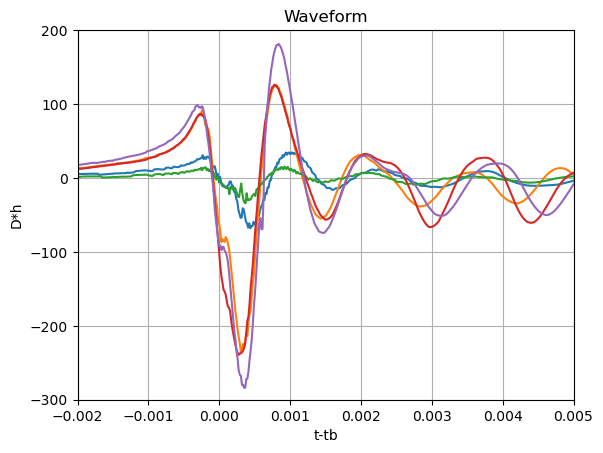

In [28]:
plt.plot(GW_time_1,GW1_strain)
plt.plot(Gw_time_2,GW2_strain)
plt.plot(Gw_time_3,GW3_strain)
plt.plot(Gw_time_4,GW4_strain)
plt.plot(Gw_time_5,GW5_strain)
plt.xlim(-0.002, 0.005)
plt.ylim(-300, 200)
plt.title('Waveform')
plt.xlabel('t-tb')
plt.ylabel('D*h')
plt.grid()

In [ ]:
#data.close()